In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
df['diabetes'].sum()

8500

In [6]:
missing_values = df.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
smoking_history_counts = df['smoking_history'].value_counts(normalize=True) * 100

In [8]:
smoking_history_counts

smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64

In [9]:
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [10]:
df.shape

(100000, 9)

In [11]:
import numpy as np
df['smoking_history'].replace('No Info', np.nan, inplace=True)

In [12]:
df.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [13]:
one_hot_needed = [
    'gender',
    'smoking_history'
]

In [14]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding the dataset
encoder = OneHotEncoder()
df_encoded = pd.get_dummies(df, columns=one_hot_needed)

#KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

#imputed data back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

In [15]:
df_imputed.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [16]:
# data = pd.get_dummies(data = df,
#                          prefix = one_hot_needed,
#                          columns = one_hot_needed)
# data.head(10)

In [17]:
df_imputed.head(20)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,20.0,0.0,0.0,27.32,6.6,85.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,44.0,0.0,0.0,19.31,6.5,200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,79.0,0.0,0.0,23.86,5.7,85.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42.0,0.0,0.0,33.64,4.8,145.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,32.0,0.0,0.0,27.32,5.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df_imputed.to_csv('cleaned_diabetes_data.csv', index=False)

In [19]:
from sklearn.model_selection import train_test_split

X = df_imputed.drop('diabetes', axis=1) 
y = df_imputed['diabetes']            

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None, shuffle=True)


In [20]:
y.sum()

8500.0

**<span style="color:darkblue; font-size:20px;">1/ Decision Tree Classifier :</span>**


In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

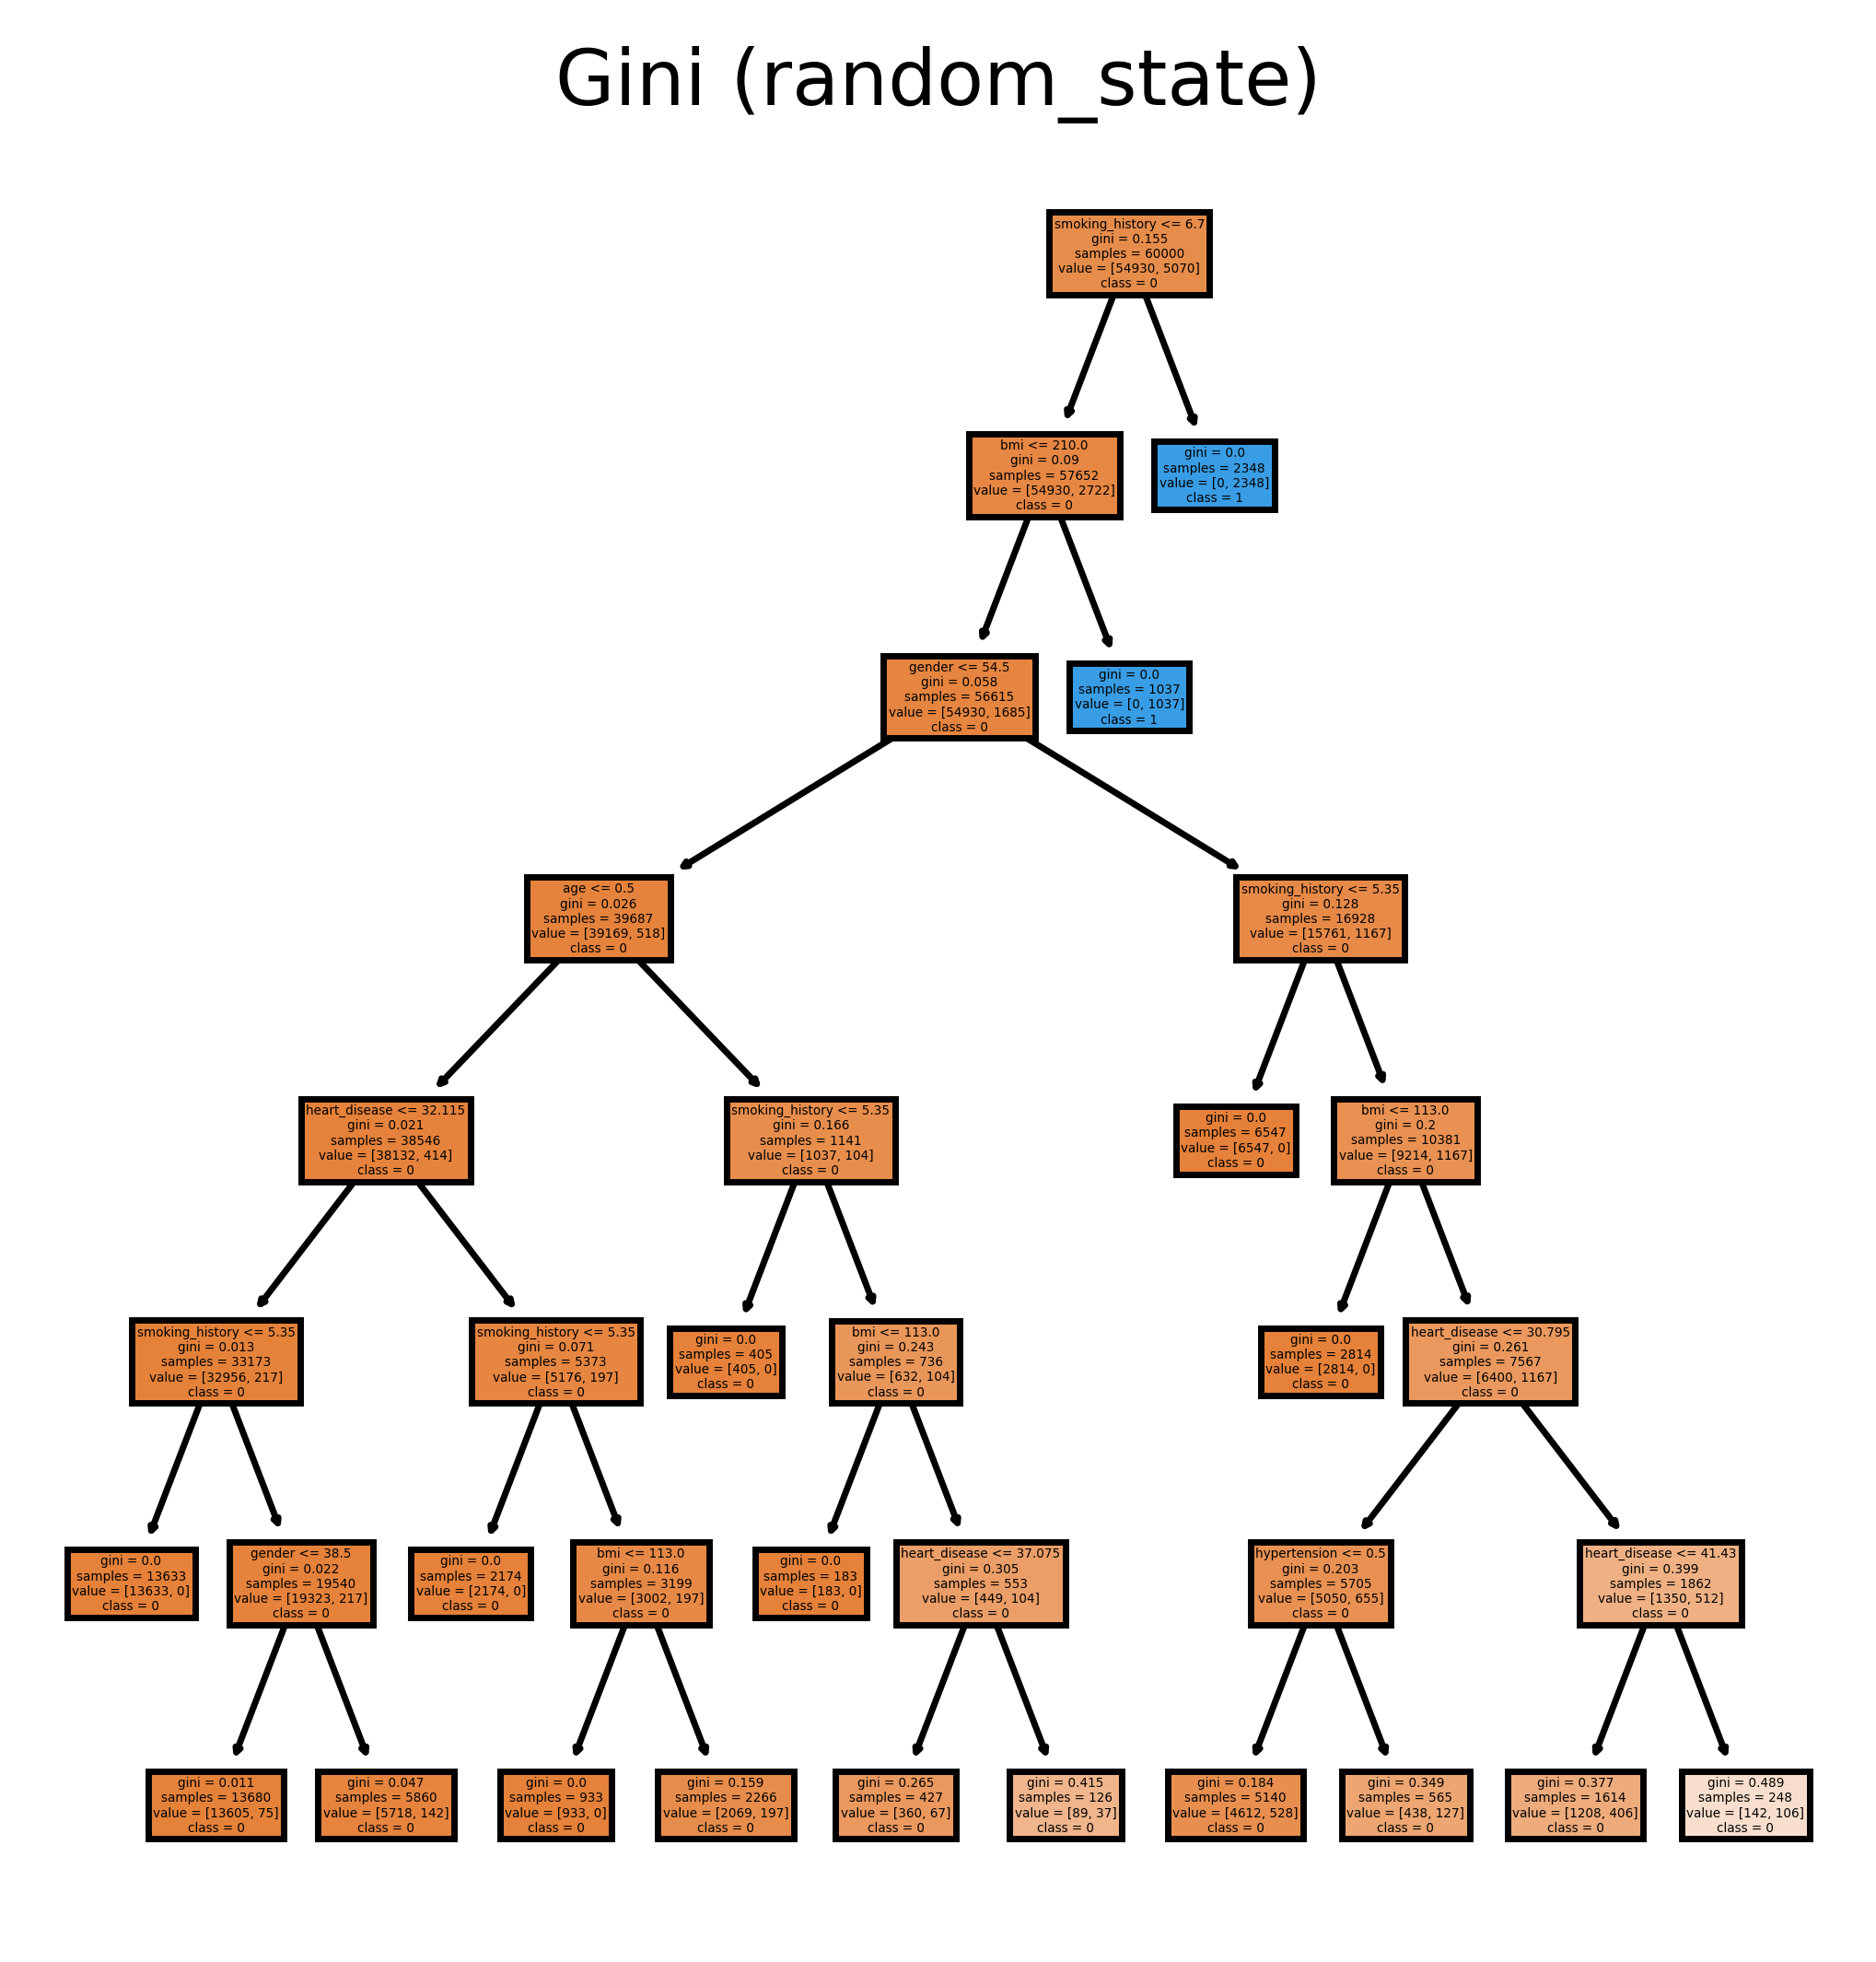

In [39]:
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=7, random_state=15, criterion='gini')
model.fit(X_train, y_train)

# Visualize the Decision Tree using matplotlib

plt.figure(figsize=(5, 5))
plot_tree(model, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state)")
plt.show()


In [40]:
y_predict = model.predict(X_test)

In [41]:
matches = np.sum(y_test == y_predict)
accuracy = matches / len(y_test)
accuracy * 100

97.14500000000001

**<span style="color:darkblue; font-size:20px;">2/ Neural network for binary classification using TensorFlow and Keras :</span>**


In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [43]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/20
6000/6000 [==============================] - 25s 4ms/step - loss: 0.2862 - accuracy: 0.9144 - val_loss: 0.2592 - val_accuracy: 0.9250
Epoch 2/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.2044 - accuracy: 0.9320 - val_loss: 0.1675 - val_accuracy: 0.9488
Epoch 3/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1793 - accuracy: 0.9389 - val_loss: 0.1489 - val_accuracy: 0.9521
Epoch 4/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1652 - accuracy: 0.9418 - val_loss: 0.1679 - val_accuracy: 0.9496
Epoch 5/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1591 - accuracy: 0.9454 - val_loss: 0.1316 - val_accuracy: 0.9513
Epoch 6/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1552 - accuracy: 0.9474 - val_loss: 0.1200 - val_accuracy: 0.9588
Epoch 7/20
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1513 - accuracy: 0.9489 - val_loss: 0.2394 - val_ac

In [46]:
predictions = model.predict(X_test)

625/625 [==============================] - 4s 2ms/step


In [47]:
#predicted_labels = np.where(predictions >= 0.5, 1, 0).flatten()

#manually calculating test accuracy
predicted_labels = np.where(predictions >= 0.5, 1, 0).reshape(-1)
comparison_array = predicted_labels == y_test.astype(int)
accuracy = np.mean(comparison_array)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 96.185%


**<span style="color:darkblue; font-size:20px;">3/ XGBoost classifier</span>**


In [48]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=100, learning_rate=0.1, verbosity=1,
                          random_state=15, eval_metric='logloss')
XGB_model.set_params(early_stopping_rounds=9)
XGB_model.fit(X_train.to_numpy(), y_train.to_numpy(), eval_set=[(X_val.to_numpy(), y_val.to_numpy())])

[0]	validation_0-logloss:0.60741
[1]	validation_0-logloss:0.53717
[2]	validation_0-logloss:0.47871
[3]	validation_0-logloss:0.42939
[4]	validation_0-logloss:0.38742
[5]	validation_0-logloss:0.35136
[6]	validation_0-logloss:0.32024
[7]	validation_0-logloss:0.29314
[8]	validation_0-logloss:0.26949
[9]	validation_0-logloss:0.24881
[10]	validation_0-logloss:0.23063
[11]	validation_0-logloss:0.21464
[12]	validation_0-logloss:0.20048
[13]	validation_0-logloss:0.18790
[14]	validation_0-logloss:0.17686
[15]	validation_0-logloss:0.16699
[16]	validation_0-logloss:0.15823
[17]	validation_0-logloss:0.15038
[18]	validation_0-logloss:0.14339
[19]	validation_0-logloss:0.13722
[20]	validation_0-logloss:0.13166
[21]	validation_0-logloss:0.12668
[22]	validation_0-logloss:0.12224
[23]	validation_0-logloss:0.11825
[24]	validation_0-logloss:0.11470
[25]	validation_0-logloss:0.11144
[26]	validation_0-logloss:0.10853
[27]	validation_0-logloss:0.10593
[28]	validation_0-logloss:0.10358
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=9,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=15, ...)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("XGB scores:\n")
print("Best Iteration: ",XGB_model.best_iteration)
print(f"Train Accuracy: {accuracy_score(XGB_model.predict(X_train),y_train) * 100}%")
print(f"Validation Accuracy: {accuracy_score(XGB_model.predict(X_val),y_val) * 100}%")

XGB scores:

Best Iteration:  98
Train Accuracy: 97.27333333333334%
Validation Accuracy: 97.27%


**<span style="color:darkblue; font-size:20px;">4/ Random Forest classifier with specified hyperparameters:</span>**


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
random_forest_model = RandomForestClassifier(min_samples_split = 100,max_depth = 7,
                                             random_state = 15,n_jobs = 5, n_estimators = 50).fit(X_train,y_train)

In [53]:
print("Accuracy Scores (RandomForestClassifier):\n")
print(f"Train: {accuracy_score(random_forest_model.predict(X_train),y_train)*100}%")
print(f"Cross-validation: {accuracy_score(random_forest_model.predict(X_val),y_val)*100}%")


Accuracy Scores (RandomForestClassifier):

Train: 97.19166666666666%
Cross-validation: 97.21499999999999%


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 500


# descriptive statistics
print(df_imputed.describe())

# correlation matrix
corr_matrix = df_imputed.corr()
print(corr_matrix)

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  gender_Female  \
count  100000.000000        100000.000000  100000.000000  100000.000000   
mean        5.527507           138.058060       0.085000       0.585520   
std         1.070672            40.708136       0.278883       0.492635   
min         3.500000            80.000000       0.000000       0.000000   
25%         

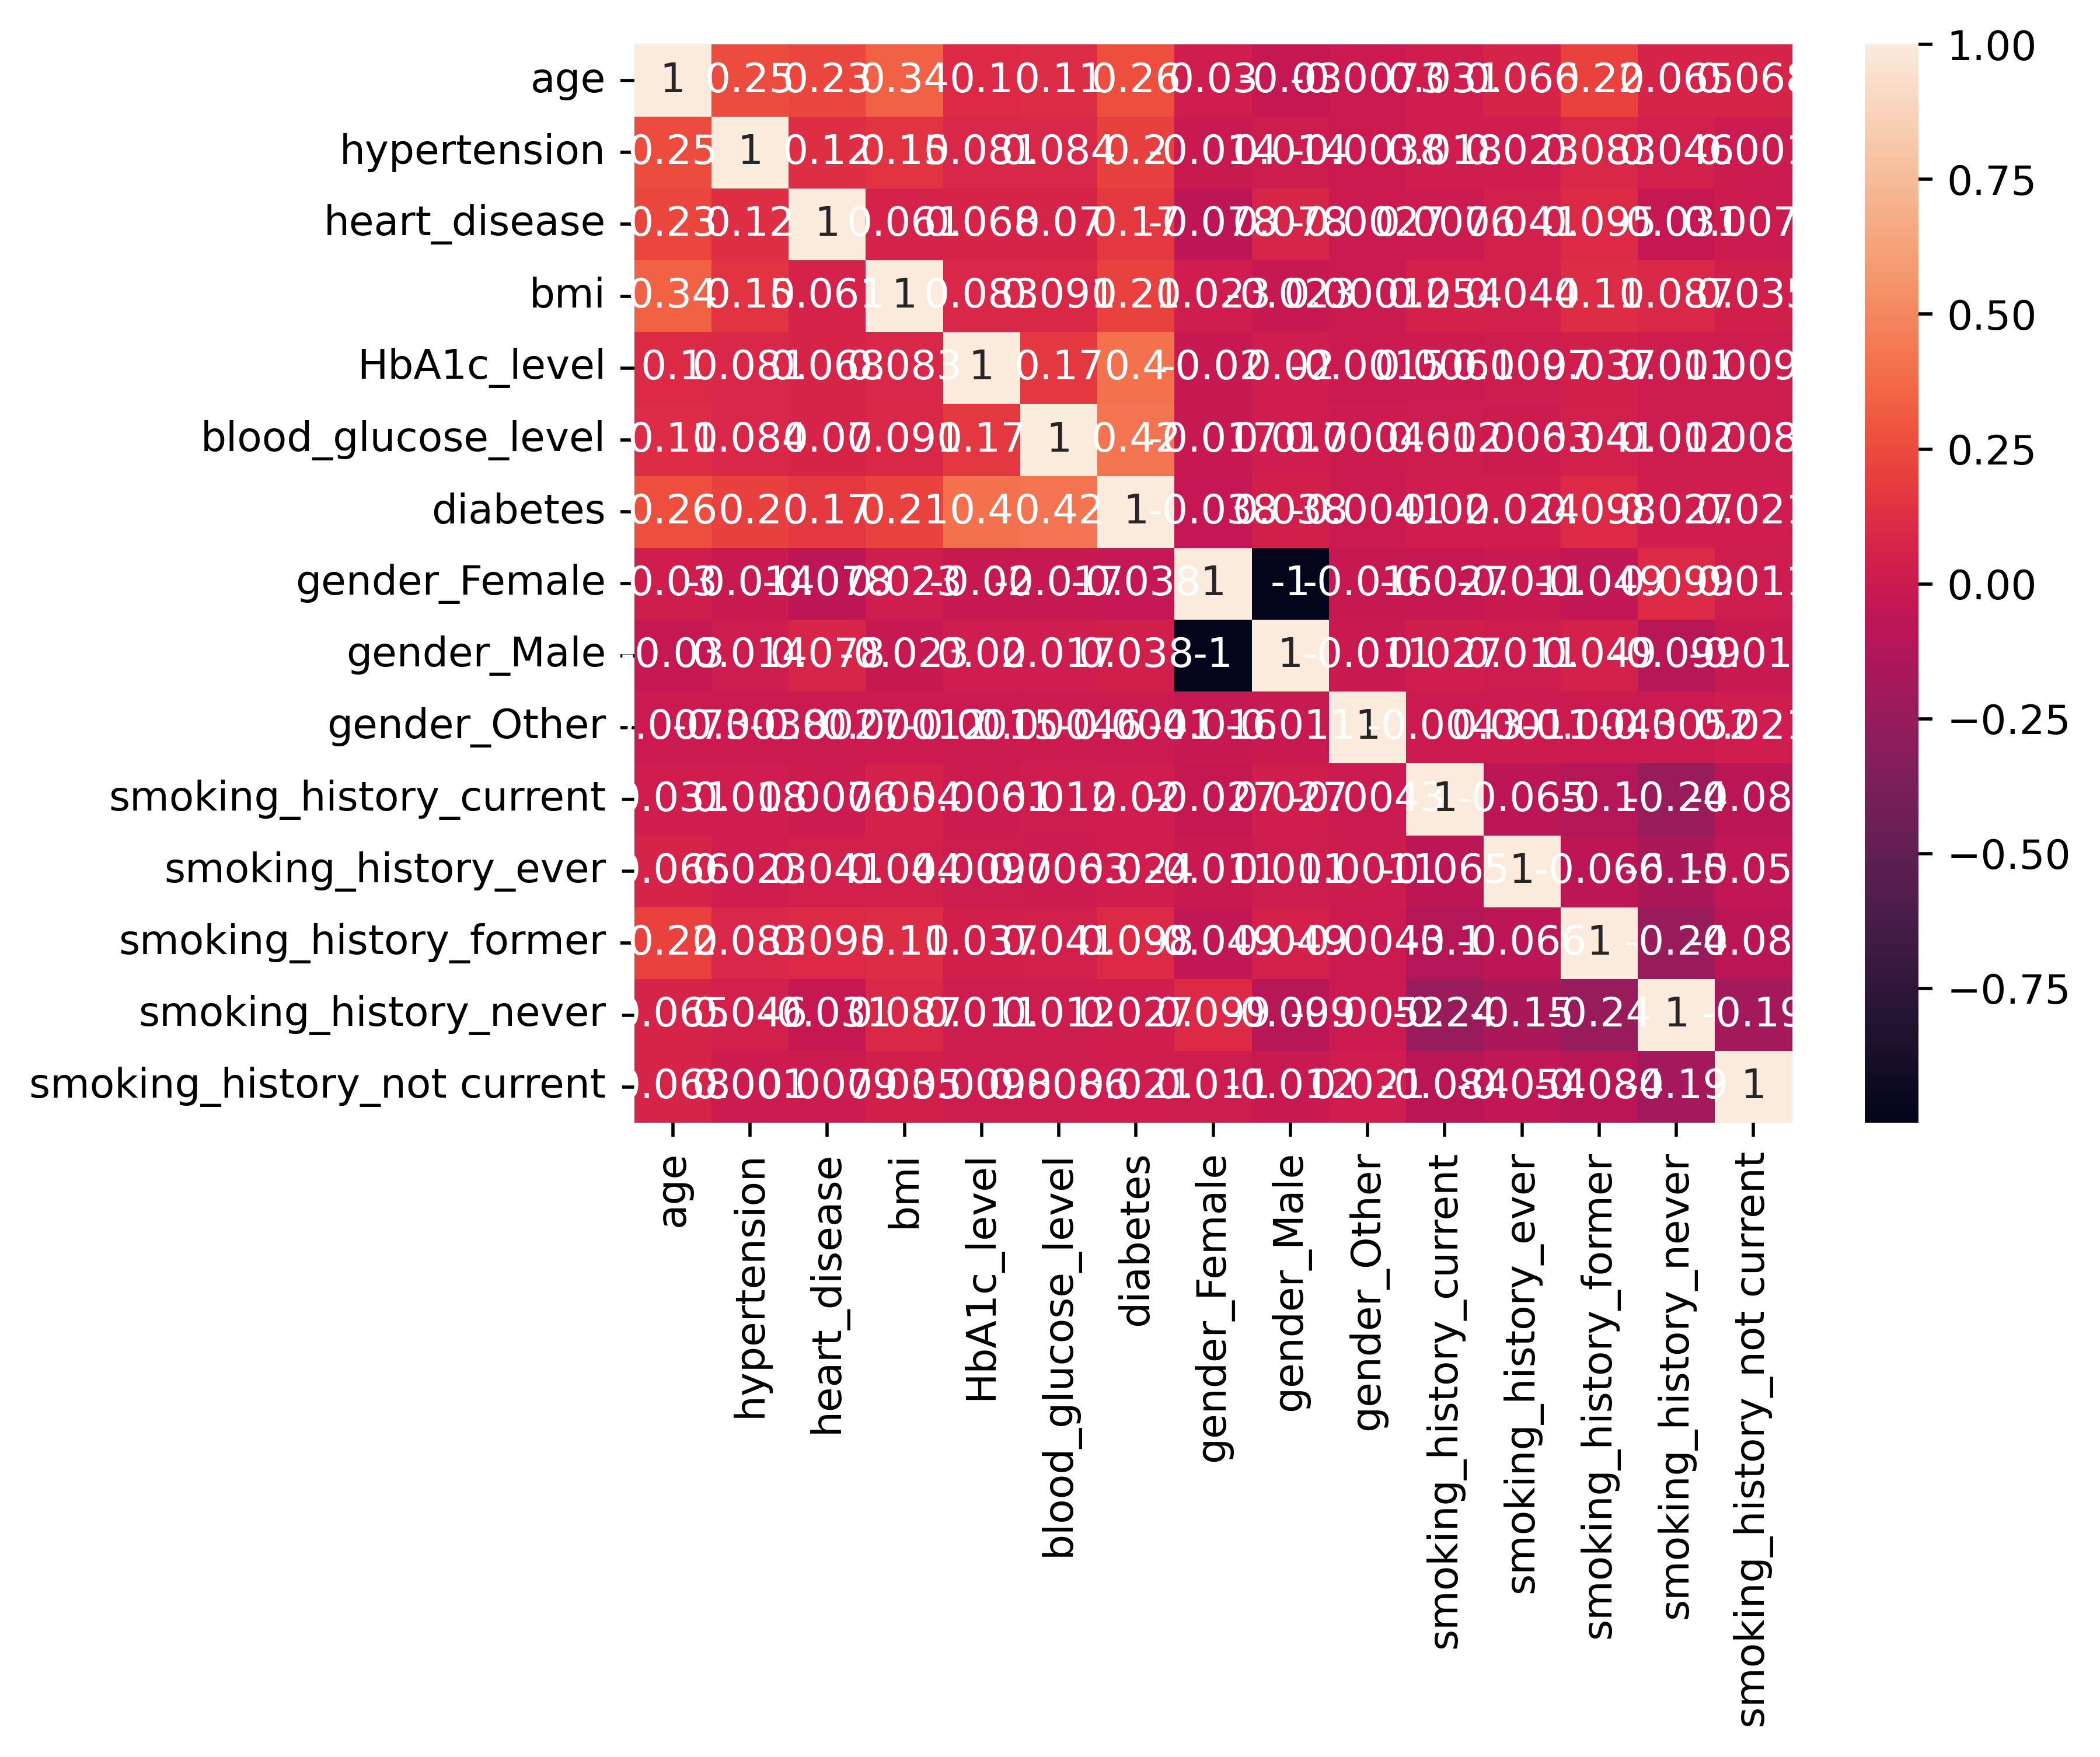

In [55]:
# heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


**<span style="color:darkblue; font-size:20px;">5/ Logistic Regression model</span>**


In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000,solver='newton-cg') 
lr_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = lr_model.predict(X_test)
matches = np.sum(y_test == y_pred)
accuracy = matches / len(y_test)
accuracy * 100